In [1]:
import matching.glema.common.utils.arg_utils as arg_utils
import matching.glema.common.utils.graph_utils as graph_utils
import matching.glema.common.utils.plot_utils as plot_utils
import matching.misc.cpg_const as cpg_const
from matching.glema.common.model import InferenceGNN

In [28]:
args = arg_utils.parse_args( use_default=True )
model_ckpt = "training/save/CPG_best_with_anchor_emb/best_model.pt"
args = arg_utils.load_args( args, model_ckpt )
args.ckpt_path = model_ckpt
args.test_data = True

In [29]:
model = InferenceGNN( args )

Loading model from training/save/CPG_best_with_anchor_emb/best_model.pt ...


In [30]:
def predict( model, G_source, G_query ) -> float:
    results = model.predict_label( [ G_query ], [ G_source ] )
    return results[ 0 ].item()


def is_subgraph( model, G_source, G_query, conf=0.5 ) -> bool:
    prediction = predict( model, G_source, G_query )
    is_sub = prediction > conf
    print( f"query is subgraph of source: {is_sub} [{prediction:.3}]" )
    return is_sub

In [31]:
record_scopes = graph_utils.get_record_scopes( args )
design_patterns = graph_utils.get_design_patterns( args )
label_args = {
    "record_scopes": record_scopes,
    "design_patterns": design_patterns
}

In [32]:
source_graphs = graph_utils.load_source_graphs( args )
pattern_graphs = graph_utils.get_pattern_graphs( args, source_graphs )
{ dp.value: len( l ) for dp, l in pattern_graphs.items() }

{'OBSERVER': 4, 'BUILDER': 2, 'ABSTRACT_FACTORY': 3}

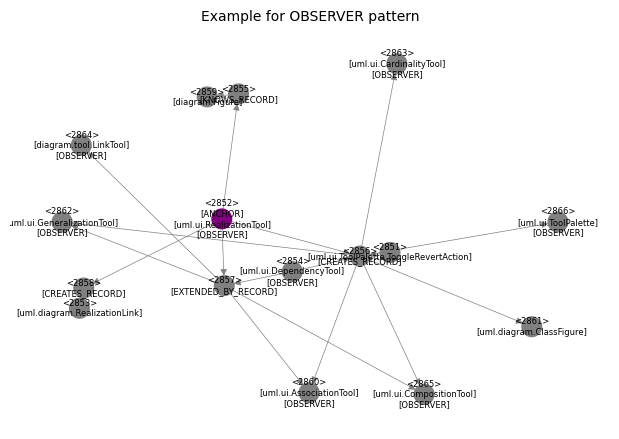

In [33]:
dp_target = cpg_const.DesignPatternType.OBSERVER
dp_target_graph = pattern_graphs[ dp_target ][ 2 ]

plot_utils.plot_graph( dp_target_graph,
                       title=f"Example for {dp_target.value} pattern",
                       nodeColors=graph_utils.get_node_colors( dp_target_graph ),
                       nodeLabels=graph_utils.get_node_labels( dp_target_graph, **label_args ) )

In [34]:
def has_pattern( model, graph, pattern_graphs, pattern_type, conf=0.5 ):
    subgraph_count = 0
    pattern_type_queries = pattern_graphs[ pattern_type ]
    for query in pattern_type_queries:
        is_sub = is_subgraph( model, graph, query, conf=conf )
        if is_sub:
            subgraph_count += 1
    return subgraph_count / len( pattern_type_queries )

In [41]:
source_graph = pattern_graphs[ dp_target ][ 0 ]
has_pattern( model, source_graph, pattern_graphs, dp_target, conf=0.7 )

query is subgraph of source: True [0.983]
query is subgraph of source: True [0.882]
query is subgraph of source: True [0.964]
query is subgraph of source: True [0.982]


1.0

In [42]:
source_graph = pattern_graphs[ cpg_const.DesignPatternType.ABSTRACT_FACTORY ][ 0 ]
has_pattern( model, source_graph, pattern_graphs, dp_target, conf=0.7 )

query is subgraph of source: True [0.982]
query is subgraph of source: True [0.873]
query is subgraph of source: True [0.968]
query is subgraph of source: True [0.978]


1.0